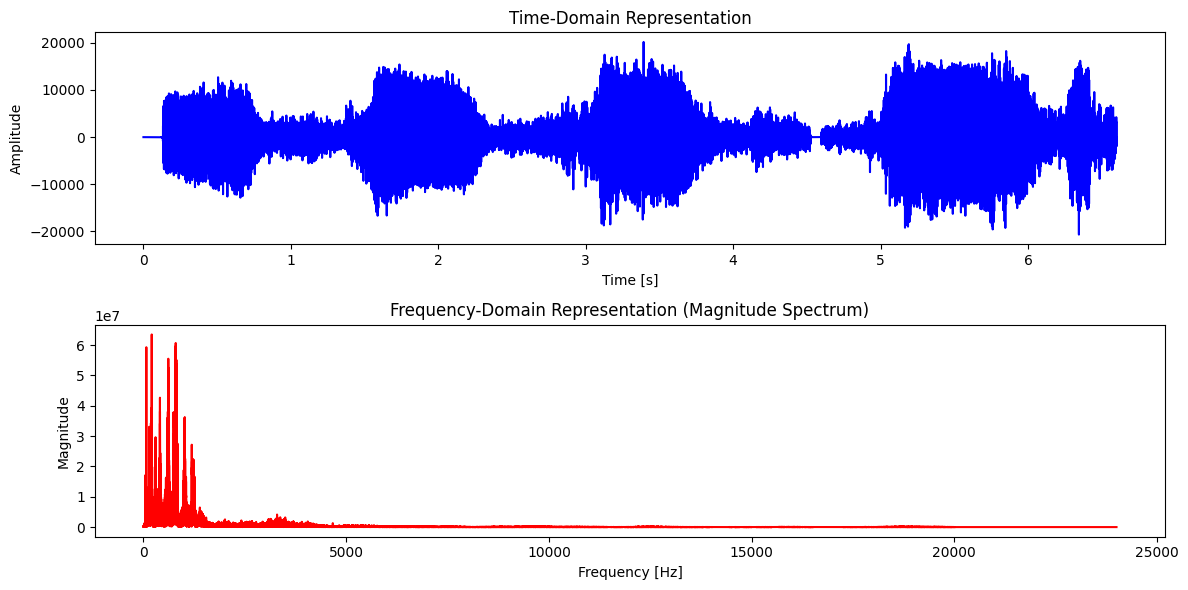

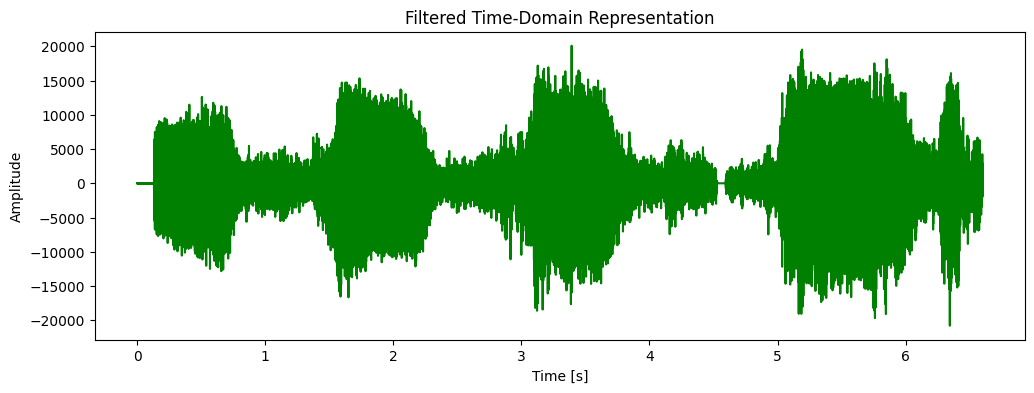

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Step 1: Load the audio file
file_path = 'hello.wav'  # Audio file path
samplerate, data = wavfile.read(file_path)

# Step 2: Stereo to Mono Conversion (if needed)
if len(data.shape) == 2:  # Check if the audio is stereo
    data = np.mean(data, axis=1)  # Convert to mono by taking the mean

# Extract time parameters
duration = len(data) / samplerate
time = np.linspace(0., duration, len(data))

# Step 3: Apply Fourier Transform
fft_data = np.fft.fft(data)  # Compute FFT
frequencies = np.fft.fftfreq(len(data), 1 / samplerate)  # Frequency bins

# Step 4: Visualize Time-Domain and Frequency-Domain Representations
plt.figure(figsize=(12, 6))

# Time-Domain Plot
plt.subplot(2, 1, 1)
plt.plot(time, data, color='blue')
plt.title("Time-Domain Representation")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

# Frequency-Domain Plot
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies) // 2], np.abs(fft_data)[:len(frequencies) // 2], color='red')
plt.title("Frequency-Domain Representation (Magnitude Spectrum)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

# Noise filtering
cutoff_freq = 5000
filtered_fft_data = fft_data.copy()
filtered_fft_data[np.abs(frequencies) > cutoff_freq] = 0

# Inverse FFT to reconstruct the signal
filtered_data = np.fft.ifft(filtered_fft_data).real

# Filtered Signal in Time Domain
plt.figure(figsize=(12, 4))
plt.plot(time, filtered_data, color='green')
plt.title("Filtered Time-Domain Representation")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()